In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NewspaperData.csv to NewspaperData.csv


In [ ]:
import pandas as pd
newspaper=pd.read_csv('NewspaperData.csv')
newspaper.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
newspaper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


<Axes: xlabel='daily', ylabel='sunday'>

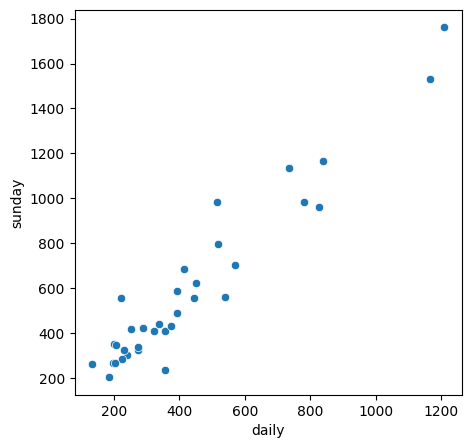

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x='daily',y='sunday',data=newspaper,palette='set1')

In [ ]:
newspaper.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: xlabel='daily', ylabel='Density'>

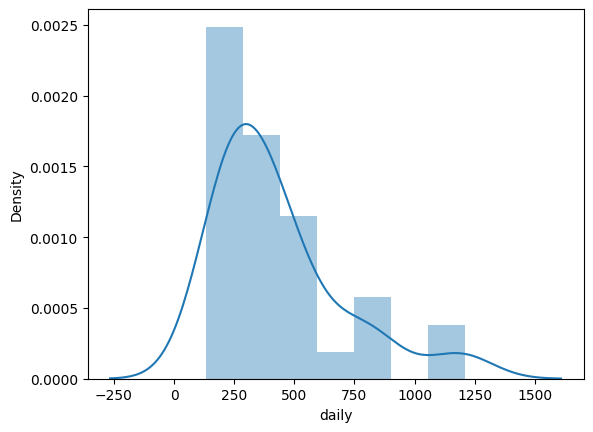

In [ ]:
import seaborn as sns
sns.distplot(newspaper['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

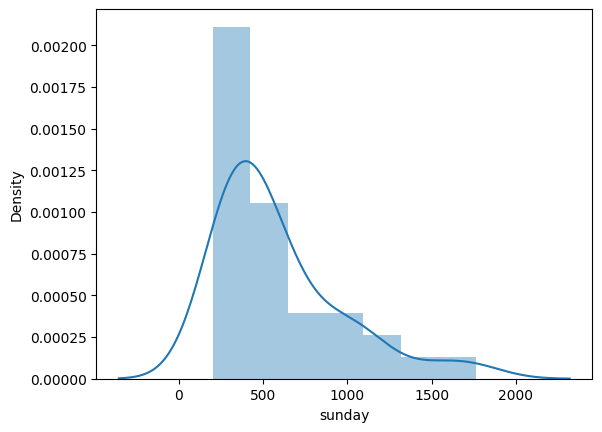

In [ ]:
sns.distplot(newspaper['sunday'])

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model=smf.ols('sunday~daily',data=newspaper).fit()

<Axes: xlabel='daily', ylabel='sunday'>

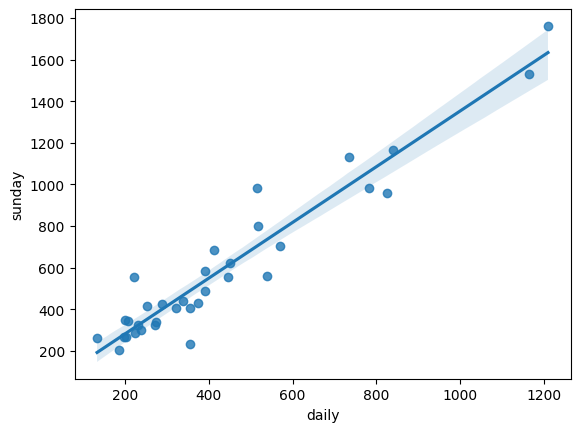

In [ ]:
import seaborn as sns
sns.regplot(x='daily',y='sunday',data=newspaper)

In [ ]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
newspaper.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
model.fittedvalues

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [ ]:
newspaper['predicated']=model.fittedvalues
newspaper[0:5]

,Newspaper,daily,sunday,predicated
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432


In [ ]:
newspaper

,Newspaper,daily,sunday,predicated
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [ ]:
newspaper['Error']=model.resid
newspaper[0:5]

,Newspaper,daily,sunday,predicated,Error
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432


In [ ]:
newspaper['Error_Sq']=(newspaper['Error'])**2
newspaper[0:5]

,Newspaper,daily,sunday,predicated,Error,Error_Sq
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509,2543.538791
1,Boston Globe,516.981,798.298,706.442705,91.855295,8437.395210
2,Boston Herald,355.628,235.084,490.275710,-255.191710,65122.808728
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284,1154.659696
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432,30700.097285


In [ ]:
newspaper['y']=13.835630+(1.339715*newspaper['daily'])+newspaper['Error']
newspaper[0:5]

,Newspaper,daily,sunday,predicated,Error,Error_Sq,y
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509,2543.538791,488.506095
1,Boston Globe,516.981,798.298,706.442705,91.855295,8437.395210,798.298125
2,Boston Herald,355.628,235.084,490.275710,-255.191710,65122.808728,235.084086
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284,1154.659696,299.451058
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432,30700.097285,559.093130


In [ ]:
mean_Squared_Error = newspaper['Error_Sq'].mean()
mean_Squared_Error

11268.692072241502

In [ ]:
model.rsquared

0.9180596895873295

In [ ]:
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [ ]:
newdata=pd.Series([200,300,215,326,412])
newdata

0    200
1    300
2    215
3    326
4    412
dtype: int64

In [ ]:
newsp=pd.DataFrame(newdata,columns=['daily'])
newsp

,daily
0,200
1,300
2,215
3,326
4,412


In [ ]:
model.predict(newsp)

0    281.778581
1    415.750057
2    301.874303
3    450.582641
4    565.798110
dtype: float64

In [ ]:
newsp['predicted']=model.predict(newsp)
newsp

,daily,predicted
0,200,281.778581
1,300,415.750057
2,215,301.874303
3,326,450.582641
4,412,565.798110
